# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [ ]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

Training set shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)

Image dimensions: (32, 32, 3)
Number of channels: 3

Number of classes: 100
Min label value: 0
Max label value: 99

Pixel value range:
Min pixel value: 0
Max pixel value: 255
Mean pixel value: 121.936059453125


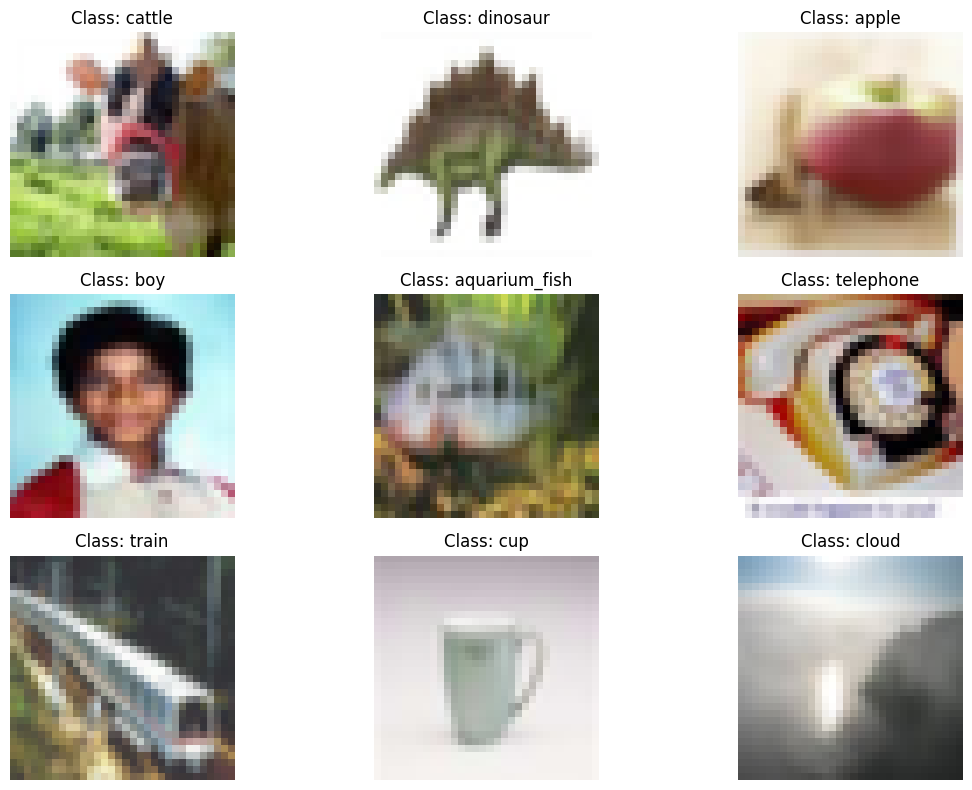

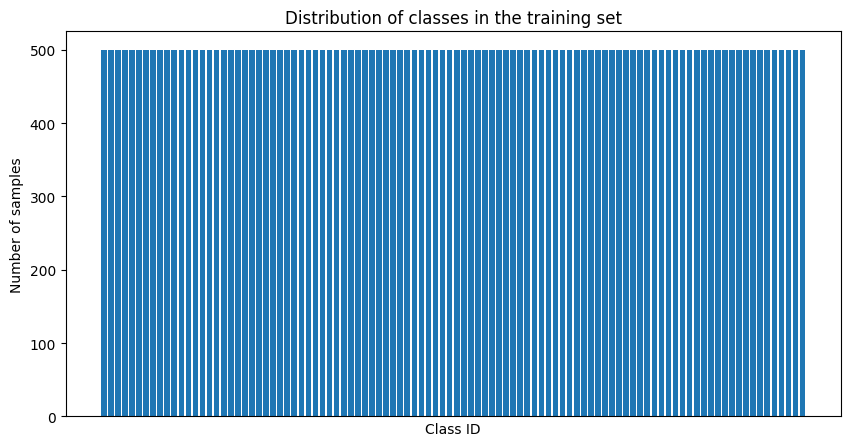


Number of samples per class in training set: 500
Total number of training samples: 50000
Total number of test samples: 10000


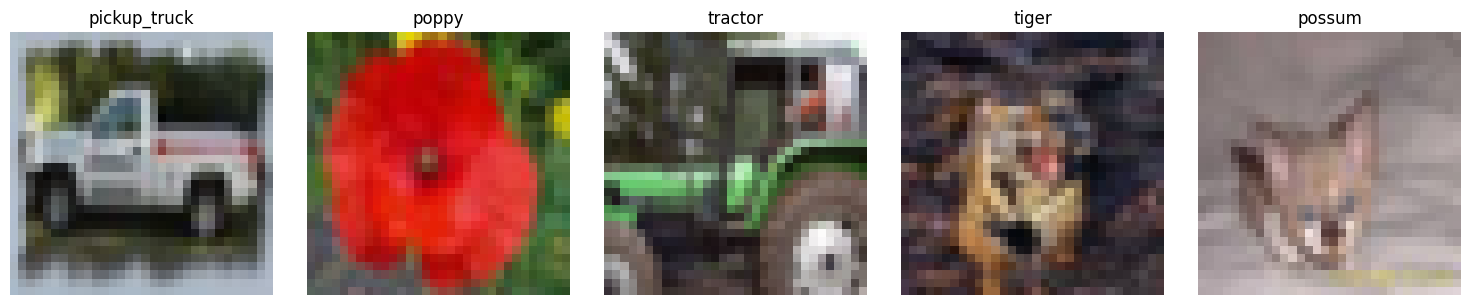

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Examine the shape of the training and test sets
print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Examine the dimensions of the images
print("\nImage dimensions:", x_train[0].shape)
print("Number of channels:", x_train[0].shape[2])

# Examine the number of classes
print("\nNumber of classes:", len(class_names))
print("Min label value:", np.min(y_train))
print("Max label value:", np.max(y_train))

# Display some statistics about the pixel values
print("\nPixel value range:")
print("Min pixel value:", np.min(x_train))
print("Max pixel value:", np.max(x_train))
print("Mean pixel value:", np.mean(x_train))

# Visualize some examples from the training set
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f"Class: {class_names[y_train[i][0]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Show the distribution of classes in the training set
unique_classes, class_counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(unique_classes, class_counts)
plt.xlabel('Class ID')
plt.ylabel('Number of samples')
plt.title('Distribution of classes in the training set')
plt.xticks([])  # Hide x-axis ticks as there are too many classes
plt.show()

# Print the number of samples per class
print("\nNumber of samples per class in training set:", class_counts[0])
print("Total number of training samples:", len(y_train))
print("Total number of test samples:", len(y_test))

# Show a random example from each of 5 random classes
random_classes = np.random.choice(100, 5, replace=False)
plt.figure(figsize=(15, 3))
for i, class_id in enumerate(random_classes):
    # Find indices of images from this class
    indices = np.where(y_train == class_id)[0]
    # Select a random image from this class
    random_idx = np.random.choice(indices)

    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[random_idx])
    plt.title(f"{class_names[class_id]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

After normalization:
Min pixel value: 0.0
Max pixel value: 1.0
Mean pixel value: 0.47818068

Original label shape: (50000,)
One-hot encoded label shape: (50000, 100)
Example of one-hot encoded label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
This corresponds to class: cattle

After train-validation split:
Training set shape: (40000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation set shape: (10000, 32, 32, 3)
Validation labels shape: (10000, 100)
Test set shape: (10000, 32, 32, 3)
Test labels shape: (10000, 100)


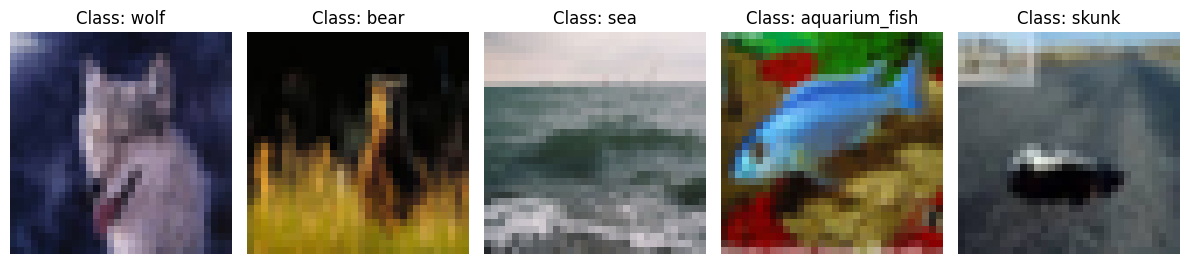

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Step 1: Normalize the images to have pixel values in the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Verify normalization
print("After normalization:")
print("Min pixel value:", np.min(x_train))
print("Max pixel value:", np.max(x_train))
print("Mean pixel value:", np.mean(x_train))

# Step 2: Convert the labels to one-hot encoded vectors
# First, ensure labels are flattened (remove extra dimension)
y_train = y_train.flatten()
y_test = y_test.flatten()

# Then convert to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=100)
y_test_one_hot = to_categorical(y_test, num_classes=100)

# Verify one-hot encoding
print("\nOriginal label shape:", y_train.shape)
print("One-hot encoded label shape:", y_train_one_hot.shape)
print("Example of one-hot encoded label:", y_train_one_hot[0])
print("This corresponds to class:", class_names[y_train[0]])

# Step 3: Split the training set into training and validation sets (80% training, 20% validation)
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train_one_hot, test_size=0.2, random_state=42
)

# Verify the split
print("\nAfter train-validation split:")
print("Training set shape:", x_train_final.shape)
print("Training labels shape:", y_train_final.shape)
print("Validation set shape:", x_val.shape)
print("Validation labels shape:", y_val.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test_one_hot.shape)

# Visualize a few normalized images to ensure they look correct
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train_final[i])
    plt.title(f"Class: {class_names[np.argmax(y_train_final[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Create a CNN model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Flatten and Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')  # 100 classes for CIFAR-100
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Print a summary of the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,390,340 (5.30 MB)

 Trainable params: 1,388,868 (5.30 MB)

 Non-trainable params: 1,472 (5.75 KB)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Categorical Cross-Entropy
- <b>Optimizer:</b> Adam


Explanation:

Categorical Cross-Entropy is ideal for multi-class classification tasks like CIFAR-100 where labels are one-hot encoded, as it measures the divergence between the predicted probability distribution and the true distribution.

Adam is chosen for its adaptive learning rate feature, which typically leads to faster and more stable convergence compared to vanilla stochastic gradient descent.

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Print a summary of the compiled model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,390,340 (5.30 MB)

 Trainable params: 1,388,868 (5.30 MB)

 Non-trainable params: 1,472 (5.75 KB)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import time

# Define callbacks for training
callbacks = [
    # Stop training when validation loss stops improving
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    # Save the best model during training
    ModelCheckpoint(
        'best_cifar100_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    # Reduce learning rate when validation loss plateaus
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

# Set training parameters
batch_size = 32
epochs = 50  # Maximum number of epochs to train

# Record start time
start_time = time.time()

# Train the model
history = model.fit(
    x_train_final,
    y_train_final,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    verbose=1
)

# Calculate training time
training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(x_val, y_val, verbose=1)
print(f"Validation accuracy: {val_accuracy:.4f}")

Epoch 1/50
1242/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0717 - loss: 4.4427
Epoch 1: val_accuracy improved from -inf to 0.22770, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.0720 - loss: 4.4392 - val_accuracy: 0.2277 - val_loss: 3.1888 - learning_rate: 0.0010
Epoch 2/50
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2213 - loss: 3.1873
Epoch 2: val_accuracy improved from 0.22770 to 0.28510, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2214 - loss: 3.1866 - val_accuracy: 0.2851 - val_loss: 2.9249 - learning_rate: 0.0010
Epoch 3/50
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3031 - loss: 2.7349
Epoch 3: val_accuracy improved from 0.28510 to 0.36380, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3031 - loss: 2.7347 - val_accuracy: 0.3638 - val_loss: 2.4416 - learning_rate: 0.0010
Epoch 4/50
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3593 - loss: 2.4724
Epoch 4: val_accuracy improved from 0.36380 to 0.39100, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3593 - loss: 2.4723 - val_accuracy: 0.3910 - val_loss: 2.4073 - learning_rate: 0.0010
Epoch 5/50
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4020 - loss: 2.2731
Epoch 5: val_accuracy improved from 0.39100 to 0.41680, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4019 - loss: 2.2731 - val_accuracy: 0.4168 - val_loss: 2.1865 - learning_rate: 0.0010
Epoch 6/50
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4269 - loss: 2.1491
Epoch 6: val_accuracy improved from 0.41680 to 0.45600, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4269 - loss: 2.1491 - val_accuracy: 0.4560 - val_loss: 2.0234 - learning_rate: 0.0010
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4581 - loss: 2.0211
Epoch 7: val_accuracy improved from 0.45600 to 0.46790, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4581 - loss: 2.0211 - val_accuracy: 0.4679 - val_loss: 1.9984 - learning_rate: 0.0010
Epoch 8/50
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4855 - loss: 1.9014
Epoch 8: val_accuracy did not improve from 0.46790
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4855 - loss: 1.9015 - val_accuracy: 0.4568 - val_loss: 2.0336 - learning_rate: 0.0010
Epoch 9/50
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4918 - loss: 1.8378
Epoch 9: val_accuracy improved from 0.46790 to 0.47820, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4918 - loss: 1.8379 - val_accuracy: 0.4782 - val_loss: 1.9296 - learning_rate: 0.0010
Epoch 10/50
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5145 - loss: 1.7608
Epoch 10: val_accuracy improved from 0.47820 to 0.51300, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5145 - loss: 1.7608 - val_accuracy: 0.5130 - val_loss: 1.8143 - learning_rate: 0.0010
Epoch 11/50
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5285 - loss: 1.6906
Epoch 11: val_accuracy did not improve from 0.51300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5284 - loss: 1.6908 - val_accuracy: 0.5119 - val_loss: 1.8127 - learning_rate: 0.0010
Epoch 12/50
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5434 - loss: 1.6254
Epoch 12: val_accuracy improved from 0.51300 to 0.51620, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5434 - loss: 1.6256 - val_accuracy: 0.5162 - val_loss: 1.8289 - learning_rate: 0.0010
Epoch 13/50
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5605 - loss: 1.5540
Epoch 13: val_accuracy improved from 0.51620 to 0.51830, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5605 - loss: 1.5541 - val_accuracy: 0.5183 - val_loss: 1.8343 - learning_rate: 0.0010
Epoch 14/50
1242/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5731 - loss: 1.5245
Epoch 14: val_accuracy improved from 0.51830 to 0.53550, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5731 - loss: 1.5247 - val_accuracy: 0.5355 - val_loss: 1.7345 - learning_rate: 0.0010
Epoch 15/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5841 - loss: 1.4666
Epoch 15: val_accuracy improved from 0.53550 to 0.53590, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5841 - loss: 1.4667 - val_accuracy: 0.5359 - val_loss: 1.7304 - learning_rate: 0.0010
Epoch 16/50
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5994 - loss: 1.4205
Epoch 16: val_accuracy improved from 0.53590 to 0.54220, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5994 - loss: 1.4207 - val_accuracy: 0.5422 - val_loss: 1.6982 - learning_rate: 0.0010
Epoch 17/50
1243/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6043 - loss: 1.3853
Epoch 17: val_accuracy improved from 0.54220 to 0.54520, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6043 - loss: 1.3856 - val_accuracy: 0.5452 - val_loss: 1.6942 - learning_rate: 0.0010
Epoch 18/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6106 - loss: 1.3544
Epoch 18: val_accuracy improved from 0.54520 to 0.55420, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6106 - loss: 1.3545 - val_accuracy: 0.5542 - val_loss: 1.6978 - learning_rate: 0.0010
Epoch 19/50
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6190 - loss: 1.3196
Epoch 19: val_accuracy did not improve from 0.55420
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6190 - loss: 1.3198 - val_accuracy: 0.5534 - val_loss: 1.6666 - learning_rate: 0.0010
Epoch 20/50
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6289 - loss: 1.2870
Epoch 20: val_accuracy did not improve from 0.55420
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6289 - loss: 1.2871 - val_accuracy: 0.5529 - val_loss: 1.6837 - learning_rate: 0.0010
Epoch 21/50
1242/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6323 - loss: 1.2612
Epoch 21: val_accuracy improved from 0.55420 to 0.56430, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6323 - loss: 1.2614 - val_accuracy: 0.5643 - val_loss: 1.6210 - learning_rate: 0.0010
Epoch 22/50
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6447 - loss: 1.2226
Epoch 22: val_accuracy did not improve from 0.56430
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6446 - loss: 1.2227 - val_accuracy: 0.5580 - val_loss: 1.6894 - learning_rate: 0.0010
Epoch 23/50
1241/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6535 - loss: 1.1868
Epoch 23: val_accuracy did not improve from 0.56430
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6534 - loss: 1.1872 - val_accuracy: 0.5540 - val_loss: 1.6950 - learning_rate: 0.0010
Epoch 24/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6546 - loss: 1.1708
Epoch 24: val_accuracy did not improve from 0.56430
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6545 - loss: 1.1708 - val_accuracy: 0.5611 - val_loss: 1.6668 - learning_rate: 0.0010
Epo

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6872 - loss: 1.0469 - val_accuracy: 0.5834 - val_loss: 1.6179 - learning_rate: 5.0000e-04
Epoch 28/50
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7063 - loss: 0.9732
Epoch 28: val_accuracy improved from 0.58340 to 0.58510, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7063 - loss: 0.9733 - val_accuracy: 0.5851 - val_loss: 1.6220 - learning_rate: 5.0000e-04
Epoch 29/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7198 - loss: 0.9354
Epoch 29: val_accuracy did not improve from 0.58510
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7198 - loss: 0.9355 - val_accuracy: 0.5791 - val_loss: 1.6430 - learning_rate: 5.0000e-04
Epoch 30/50
1243/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7236 - loss: 0.9258
Epoch 30: val_accuracy improved from 0.58510 to 0.58610, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7235 - loss: 0.9260 - val_accuracy: 0.5861 - val_loss: 1.6307 - learning_rate: 5.0000e-04
Epoch 31/50
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7257 - loss: 0.9076
Epoch 31: val_accuracy improved from 0.58610 to 0.58710, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7256 - loss: 0.9077 - val_accuracy: 0.5871 - val_loss: 1.6428 - learning_rate: 5.0000e-04
Epoch 32/50
1241/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7286 - loss: 0.9051
Epoch 32: val_accuracy did not improve from 0.58710

Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7286 - loss: 0.9052 - val_accuracy: 0.5842 - val_loss: 1.6415 - learning_rate: 5.0000e-04
Epoch 33/50
1243/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7406 - loss: 0.8384
Epoch 33: val_accuracy improved from 0.58710 to 0.59820, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7406 - loss: 0.8384 - val_accuracy: 0.5982 - val_loss: 1.6167 - learning_rate: 2.5000e-04
Epoch 34/50
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7464 - loss: 0.8270
Epoch 34: val_accuracy did not improve from 0.59820
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7464 - loss: 0.8270 - val_accuracy: 0.5932 - val_loss: 1.6477 - learning_rate: 2.5000e-04
Epoch 35/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7566 - loss: 0.7987
Epoch 35: val_accuracy did not improve from 0.59820
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7566 - loss: 0.7987 - val_accuracy: 0.5903 - val_loss: 1.6454 - learning_rate: 2.5000e-04
Epoch 36/50
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7552 - loss: 0.8017
Epoch 36: val_accuracy improved from 0.59820 to 0.59880, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7552 - loss: 0.8017 - val_accuracy: 0.5988 - val_loss: 1.6415 - learning_rate: 2.5000e-04
Epoch 37/50
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7578 - loss: 0.7740
Epoch 37: val_accuracy did not improve from 0.59880
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7578 - loss: 0.7740 - val_accuracy: 0.5939 - val_loss: 1.6528 - learning_rate: 2.5000e-04
Epoch 38/50
1242/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7607 - loss: 0.7757
Epoch 38: val_accuracy did not improve from 0.59880

Epoch 38: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7607 - loss: 0.7757 - val_accuracy: 0.5917 - val_loss: 1.6592 - learning_rate: 2.5000e-04
Epoch 39/50
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7715 - loss: 0.7449
Epoch 39: val_accuracy did not improve from 0.59880
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7698 - loss: 0.7384 - val_accuracy: 0.5996 - val_loss: 1.6409 - learning_rate: 1.2500e-04
Epoch 41/50
1243/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7694 - loss: 0.7306
Epoch 41: val_accuracy did not improve from 0.59960
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7694 - loss: 0.7306 - val_accuracy: 0.5950 - val_loss: 1.6537 - learning_rate: 1.2500e-04
Epoch 42/50
1241/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7764 - loss: 0.7143
Epoch 42: val_accuracy did not improve from 0.59960
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7764 - loss: 0.7144 - val_accuracy: 0.5940 - val_loss: 1.6608 - learning_rate: 1.2500e-04
Epoch 43/50
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7829 - loss: 0.7000
Epoch 43: val_accuracy did not improve from 0.59960

Epoch 43: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.5982 (59.82%)
- <b>Other metric:</b> Top-5 Accuracy
- <b>Reason for selection:</b> Top-5 accuracy is particularly valuable for datasets with a large number of classes like CIFAR-100 (100 classes). In many real-world applications, having the correct class among the top 5 predictions is still useful. For example, in image search or recommendation systems, presenting the top 5 most likely categories can be more practical than insisting on a single correct prediction. This metric measures whether the true class appears in the model's top 5 predictions for each sample.
- <b>Value of metric:</b> 0.8543 (85.43%)
- <b>Interpretation of metric value:</b> The top-5 accuracy of 85.43% indicates that for approximately 85% of the test images, the correct class is among the model's top 5 predictions. This is significantly higher than the standard accuracy of 59.82%, suggesting that while the model may not always predict the exact correct class as its top choice, it often includes the correct class among its top considerations.

In [ ]:
# Load the best model weights
model.load_weights('best_cifar100_model.h5')

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot, verbose=1)

# Calculate Top-5 accuracy
y_pred_probs = model.predict(x_test)
top5_acc = 0
for i in range(len(y_test)):
    if y_test[i] in np.argsort(y_pred_probs[i])[-5:]:
        top5_acc += 1
top5_acc /= len(y_test)

print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Top-5 accuracy: {top5_acc:.4f}")

# Calculate per-class accuracy for a few classes
from sklearn.metrics import classification_report

# Convert predictions to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Print classification report for first 10 classes
print("\nClassification Report (first 10 classes):")
target_names = [class_names[i] for i in range(10)]
print(classification_report(y_test, y_pred, labels=range(10), target_names=target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6037 - loss: 1.6269
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Test accuracy: 0.5982
Top-5 accuracy: 0.8543

Classification Report (first 10 classes):
               precision    recall  f1-score   support

        apple       0.77      0.81      0.79       100
aquarium_fish       0.77      0.72      0.75       100
         baby       0.51      0.55      0.53       100
         bear       0.37      0.28      0.32       100
       beaver       0.38      0.51      0.43       100
          bed       0.59      0.55      0.57       100
          bee       0.61      0.65      0.63       100
       beetle       0.61      0.68      0.64       100
      bicycle       0.85      0.76      0.80       100
       bottle       0.73      0.74      0.73       100

    micro avg       0.61      0.62      0.62      1000
    macro avg       0.62      0.62      0.62      1000
 weighted avg       0.62      0.62      0.62      1000



### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

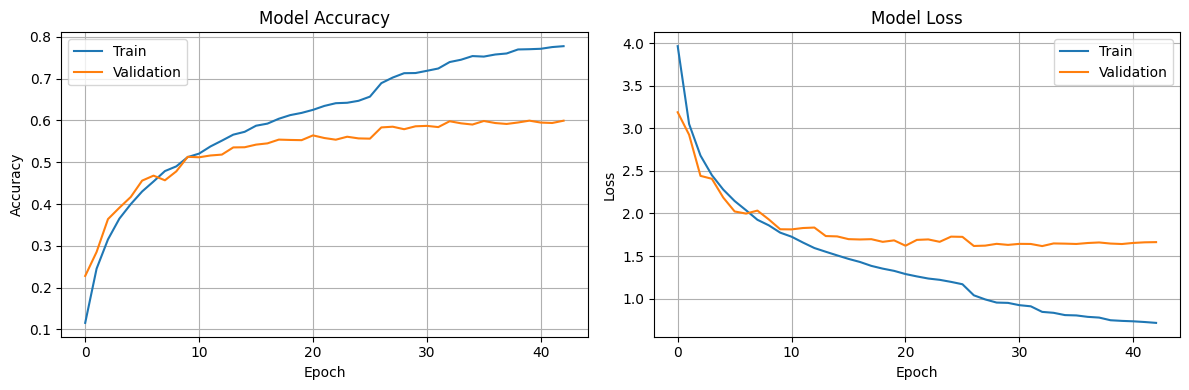

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


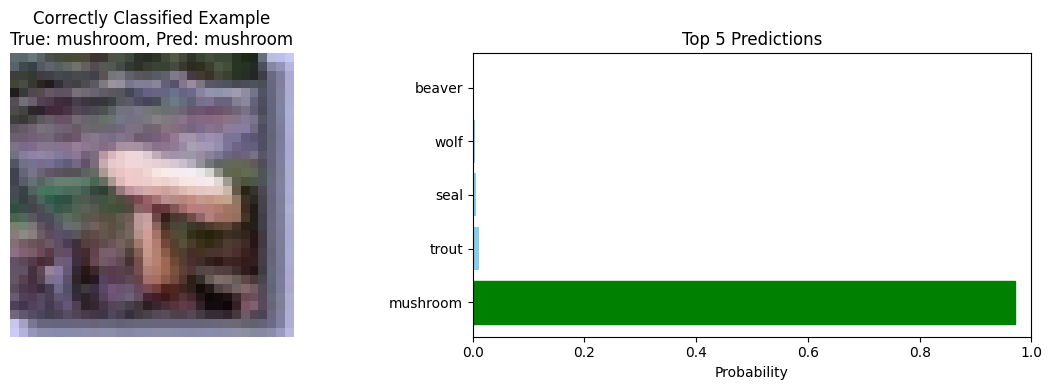

True class: mushroom
Predicted class: mushroom with probability 0.9702

Top 5 predictions:
1. mushroom: 0.9702
2. trout: 0.0115
3. seal: 0.0053
4. wolf: 0.0047
5. beaver: 0.0017


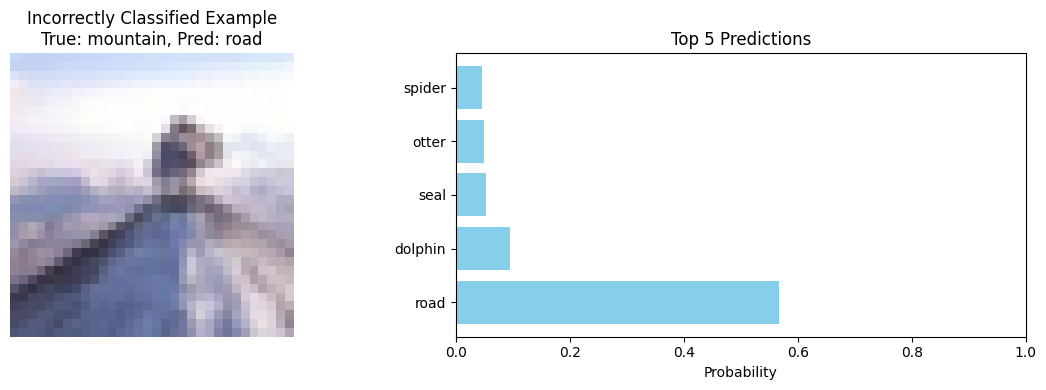

True class: mountain
Predicted class: road with probability 0.5675

Top 5 predictions:
1. road: 0.5675
2. dolphin: 0.0956
3. seal: 0.0527
4. otter: 0.0492
5. spider: 0.0458


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Get model predictions on test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Find correctly and incorrectly classified examples
correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

# Select one correct and one incorrect example
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Function to plot image with prediction probabilities
def plot_prediction_probabilities(img_idx, title):
    img = x_test[img_idx]
    true_label = y_test[img_idx]
    pred_label = y_pred[img_idx]
    probs = y_pred_probs[img_idx]

    # Get top 5 predictions
    top5_idx = np.argsort(probs)[-5:][::-1]
    top5_probs = probs[top5_idx]
    top5_labels = [class_names[i] for i in top5_idx]

    # Create figure with image and bar chart
    plt.figure(figsize=(12, 4))

    # Plot the image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"{title}\nTrue: {class_names[true_label]}, Pred: {class_names[pred_label]}")
    plt.axis('off')

    # Plot top 5 probabilities
    plt.subplot(1, 2, 2)
    bars = plt.barh(range(5), top5_probs, color='skyblue')
    plt.yticks(range(5), top5_labels)
    plt.xlabel('Probability')
    plt.title('Top 5 Predictions')
    plt.xlim(0, 1)

    # Highlight true label if in top 5
    if true_label in top5_idx:
        true_idx = np.where(top5_idx == true_label)[0][0]
        bars[true_idx].set_color('green')

    plt.tight_layout()
    plt.show()

    # Print detailed probabilities
    print(f"True class: {class_names[true_label]}")
    print(f"Predicted class: {class_names[pred_label]} with probability {probs[pred_label]:.4f}")
    print("\nTop 5 predictions:")
    for i, idx in enumerate(top5_idx):
        print(f"{i+1}. {class_names[idx]}: {probs[idx]:.4f}")

# Plot correct example
plot_prediction_probabilities(correct_idx, "Correctly Classified Example")

# Plot incorrect example
plot_prediction_probabilities(incorrect_idx, "Incorrectly Classified Example")

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Create an enhanced model with the same architecture
enhanced_model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Flatten and Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')  # 100 classes for CIFAR-100
])

# Compile the model with SGD with momentum instead of Adam
enhanced_model.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    metrics=['accuracy']
)

# Define callbacks for training
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=15,  # Increased patience for SGD
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        'best_sgd_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,  # More aggressive reduction for SGD
        patience=5,
        min_lr=1e-5,
        verbose=1
    )
]

# Train the model with SGD with momentum
enhanced_history = enhanced_model.fit(
    x_train_final,
    y_train_final,
    batch_size=32,
    epochs=60,  # More epochs for SGD to converge
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/60
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0478 - loss: 4.8111
Epoch 1: val_accuracy improved from -inf to 0.17120, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.0479 - loss: 4.8089 - val_accuracy: 0.1712 - val_loss: 3.5038 - learning_rate: 0.0100
Epoch 2/60
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1630 - loss: 3.5608
Epoch 2: val_accuracy improved from 0.17120 to 0.25360, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1630 - loss: 3.5603 - val_accuracy: 0.2536 - val_loss: 3.0231 - learning_rate: 0.0100
Epoch 3/60
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2339 - loss: 3.1063
Epoch 3: val_accuracy improved from 0.25360 to 0.28590, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2339 - loss: 3.1061 - val_accuracy: 0.2859 - val_loss: 2.8334 - learning_rate: 0.0100
Epoch 4/60
1242/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2884 - loss: 2.8304
Epoch 4: val_accuracy improved from 0.28590 to 0.36360, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2885 - loss: 2.8301 - val_accuracy: 0.3636 - val_loss: 2.4906 - learning_rate: 0.0100
Epoch 5/60
1240/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3334 - loss: 2.5955
Epoch 5: val_accuracy improved from 0.36360 to 0.39280, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3334 - loss: 2.5953 - val_accuracy: 0.3928 - val_loss: 2.3099 - learning_rate: 0.0100
Epoch 6/60
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3702 - loss: 2.4190
Epoch 6: val_accuracy improved from 0.39280 to 0.42520, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3702 - loss: 2.4189 - val_accuracy: 0.4252 - val_loss: 2.1815 - learning_rate: 0.0100
Epoch 7/60
1243/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3986 - loss: 2.2836
Epoch 7: val_accuracy did not improve from 0.42520
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3986 - loss: 2.2836 - val_accuracy: 0.4078 - val_loss: 2.2499 - learning_rate: 0.0100
Epoch 8/60
1242/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4209 - loss: 2.1823
Epoch 8: val_accuracy improved from 0.42520 to 0.42920, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4209 - loss: 2.1823 - val_accuracy: 0.4292 - val_loss: 2.1699 - learning_rate: 0.0100
Epoch 9/60
1241/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4438 - loss: 2.0663
Epoch 9: val_accuracy improved from 0.42920 to 0.45670, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4438 - loss: 2.0665 - val_accuracy: 0.4567 - val_loss: 2.0393 - learning_rate: 0.0100
Epoch 10/60
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4650 - loss: 1.9947
Epoch 10: val_accuracy improved from 0.45670 to 0.46240, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4650 - loss: 1.9948 - val_accuracy: 0.4624 - val_loss: 2.0365 - learning_rate: 0.0100
Epoch 11/60
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4760 - loss: 1.9269
Epoch 11: val_accuracy improved from 0.46240 to 0.48500, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4760 - loss: 1.9270 - val_accuracy: 0.4850 - val_loss: 1.9348 - learning_rate: 0.0100
Epoch 12/60
1241/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4961 - loss: 1.8394
Epoch 12: val_accuracy improved from 0.48500 to 0.50540, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4961 - loss: 1.8396 - val_accuracy: 0.5054 - val_loss: 1.8510 - learning_rate: 0.0100
Epoch 13/60
1241/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5083 - loss: 1.7958
Epoch 13: val_accuracy did not improve from 0.50540
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5082 - loss: 1.7959 - val_accuracy: 0.5002 - val_loss: 1.8720 - learning_rate: 0.0100
Epoch 14/60
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5189 - loss: 1.7310
Epoch 14: val_accuracy improved from 0.50540 to 0.51740, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5189 - loss: 1.7312 - val_accuracy: 0.5174 - val_loss: 1.8186 - learning_rate: 0.0100
Epoch 15/60
1242/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5352 - loss: 1.6734
Epoch 15: val_accuracy did not improve from 0.51740
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5351 - loss: 1.6737 - val_accuracy: 0.5104 - val_loss: 1.8304 - learning_rate: 0.0100
Epoch 16/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5462 - loss: 1.6281
Epoch 16: val_accuracy did not improve from 0.51740
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5462 - loss: 1.6281 - val_accuracy: 0.5079 - val_loss: 1.8294 - learning_rate: 0.0100
Epoch 17/60
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5531 - loss: 1.6016
Epoch 17: val_accuracy improved from 0.51740 to 0.52400, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5531 - loss: 1.6017 - val_accuracy: 0.5240 - val_loss: 1.7944 - learning_rate: 0.0100
Epoch 18/60
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5700 - loss: 1.5400
Epoch 18: val_accuracy improved from 0.52400 to 0.53150, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5699 - loss: 1.5402 - val_accuracy: 0.5315 - val_loss: 1.7709 - learning_rate: 0.0100
Epoch 19/60
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5713 - loss: 1.5188
Epoch 19: val_accuracy improved from 0.53150 to 0.54040, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5713 - loss: 1.5188 - val_accuracy: 0.5404 - val_loss: 1.7247 - learning_rate: 0.0100
Epoch 20/60
1241/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5772 - loss: 1.4878
Epoch 20: val_accuracy did not improve from 0.54040
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5772 - loss: 1.4880 - val_accuracy: 0.5354 - val_loss: 1.7429 - learning_rate: 0.0100
Epoch 21/60
1243/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5899 - loss: 1.4514
Epoch 21: val_accuracy did not improve from 0.54040
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5899 - loss: 1.4516 - val_accuracy: 0.5402 - val_loss: 1.7502 - learning_rate: 0.0100
Epoch 22/60
1242/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5976 - loss: 1.4204
Epoch 22: val_accuracy did not improve from 0.54040
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5975 - loss: 1.4206 - val_accuracy: 0.5402 - val_loss: 1.7233 - learning_rate: 0.0100
Ep

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6053 - loss: 1.3658 - val_accuracy: 0.5420 - val_loss: 1.7118 - learning_rate: 0.0100
Epoch 25/60
1241/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6154 - loss: 1.3533
Epoch 25: val_accuracy improved from 0.54200 to 0.54230, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6153 - loss: 1.3535 - val_accuracy: 0.5423 - val_loss: 1.7103 - learning_rate: 0.0100
Epoch 26/60
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6168 - loss: 1.3287
Epoch 26: val_accuracy improved from 0.54230 to 0.55150, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6168 - loss: 1.3288 - val_accuracy: 0.5515 - val_loss: 1.7040 - learning_rate: 0.0100
Epoch 27/60
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6268 - loss: 1.2937
Epoch 27: val_accuracy did not improve from 0.55150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6268 - loss: 1.2938 - val_accuracy: 0.5440 - val_loss: 1.7483 - learning_rate: 0.0100
Epoch 28/60
1243/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6323 - loss: 1.2671
Epoch 28: val_accuracy did not improve from 0.55150
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6322 - loss: 1.2672 - val_accuracy: 0.5418 - val_loss: 1.7601 - learning_rate: 0.0100
Epoch 29/60
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6383 - loss: 1.2534
Epoch 29: val_accuracy improved from 0.55150 to 0.55580, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6383 - loss: 1.2535 - val_accuracy: 0.5558 - val_loss: 1.7103 - learning_rate: 0.0100
Epoch 30/60
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6446 - loss: 1.2234
Epoch 30: val_accuracy did not improve from 0.55580
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6446 - loss: 1.2235 - val_accuracy: 0.5424 - val_loss: 1.7839 - learning_rate: 0.0100
Epoch 31/60
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6472 - loss: 1.2077
Epoch 31: val_accuracy did not improve from 0.55580

Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6471 - loss: 1.2078 - val_accuracy: 0.5531 - val_loss: 1.7119 - learning_rate: 0.0100
Epoch 32/60
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6745 - loss: 1.0961
Epoch 32: val_accuracy improved from 0.55580 to 0.57670, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6745 - loss: 1.0960 - val_accuracy: 0.5767 - val_loss: 1.6181 - learning_rate: 0.0020
Epoch 33/60
1240/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6911 - loss: 1.0456
Epoch 33: val_accuracy improved from 0.57670 to 0.57720, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6911 - loss: 1.0456 - val_accuracy: 0.5772 - val_loss: 1.6330 - learning_rate: 0.0020
Epoch 34/60
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7013 - loss: 1.0075
Epoch 34: val_accuracy improved from 0.57720 to 0.58090, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7013 - loss: 1.0075 - val_accuracy: 0.5809 - val_loss: 1.6226 - learning_rate: 0.0020
Epoch 35/60
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7042 - loss: 0.9945
Epoch 35: val_accuracy did not improve from 0.58090
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7042 - loss: 0.9945 - val_accuracy: 0.5784 - val_loss: 1.6593 - learning_rate: 0.0020
Epoch 36/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7072 - loss: 0.9796
Epoch 36: val_accuracy improved from 0.58090 to 0.58140, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7072 - loss: 0.9796 - val_accuracy: 0.5814 - val_loss: 1.6429 - learning_rate: 0.0020
Epoch 37/60
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7108 - loss: 0.9632
Epoch 37: val_accuracy did not improve from 0.58140

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7108 - loss: 0.9632 - val_accuracy: 0.5801 - val_loss: 1.6498 - learning_rate: 0.0020
Epoch 38/60
1241/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7158 - loss: 0.9436
Epoch 38: val_accuracy improved from 0.58140 to 0.58510, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7158 - loss: 0.9436 - val_accuracy: 0.5851 - val_loss: 1.6336 - learning_rate: 4.0000e-04
Epoch 39/60
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7175 - loss: 0.9359
Epoch 39: val_accuracy did not improve from 0.58510
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7175 - loss: 0.9359 - val_accuracy: 0.5833 - val_loss: 1.6349 - learning_rate: 4.0000e-04
Epoch 40/60
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7189 - loss: 0.9300
Epoch 40: val_accuracy did not improve from 0.58510
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7189 - loss: 0.9300 - val_accuracy: 0.5846 - val_loss: 1.6385 - learning_rate: 4.0000e-04
Epoch 41/60
1241/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7244 - loss: 0.9197
Epoch 41: val_accuracy did not improve from 0.58510
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7244 - loss: 0.9196 - val_accuracy: 0.5844 - val_loss: 1.6357 - learning_rate


Epoch 42: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7180 - loss: 0.9243 - val_accuracy: 0.5859 - val_loss: 1.6380 - learning_rate: 4.0000e-04
Epoch 43/60
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7216 - loss: 0.9253
Epoch 43: val_accuracy improved from 0.58590 to 0.58670, saving model to best_sgd_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7216 - loss: 0.9252 - val_accuracy: 0.5867 - val_loss: 1.6360 - learning_rate: 8.0000e-05
Epoch 44/60
1242/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7252 - loss: 0.9035
Epoch 44: val_accuracy did not improve from 0.58670
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7252 - loss: 0.9035 - val_accuracy: 0.5849 - val_loss: 1.6371 - learning_rate: 8.0000e-05
Epoch 45/60
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7247 - loss: 0.9096
Epoch 45: val_accuracy did not improve from 0.58670
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7247 - loss: 0.9096 - val_accuracy: 0.5858 - val_loss: 1.6365 - learning_rate: 8.0000e-05
Epoch 46/60
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7192 - loss: 0.9131
Epoch 46: val_accuracy did not improve from 0.58670
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7192 - loss: 0.9130 - val_accuracy: 0.5844 - val_loss: 1.6377 - learning_rate

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5862 - loss: 1.6334
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
SGD+Momentum Test accuracy: 0.5858
SGD+Momentum Top-5 accuracy: 0.8460
Original Adam Test accuracy: 0.5982


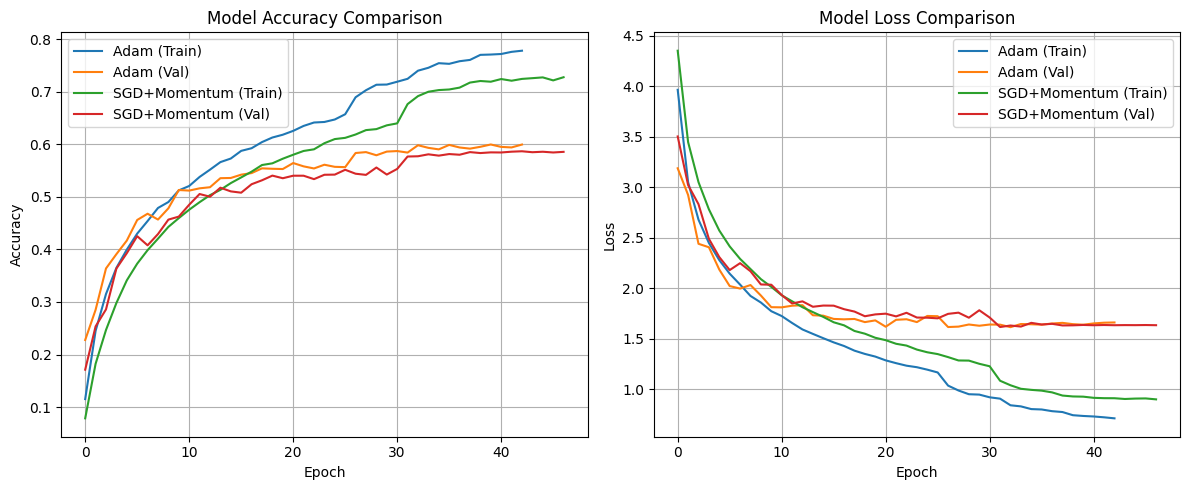

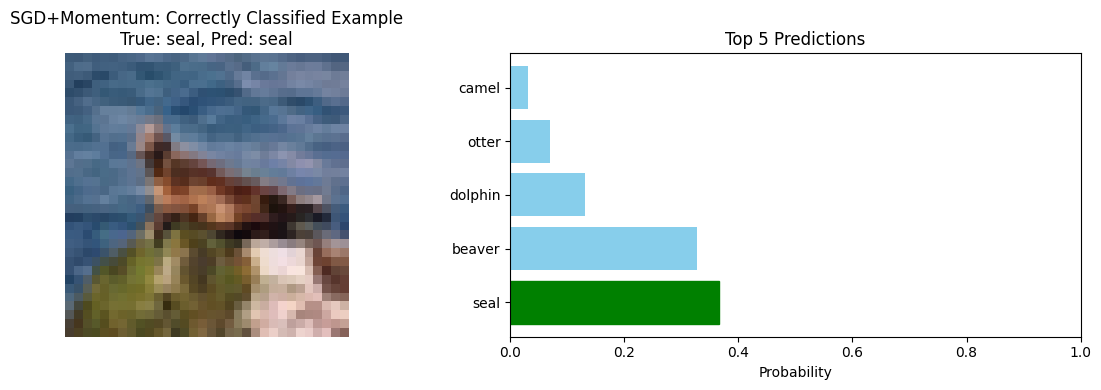

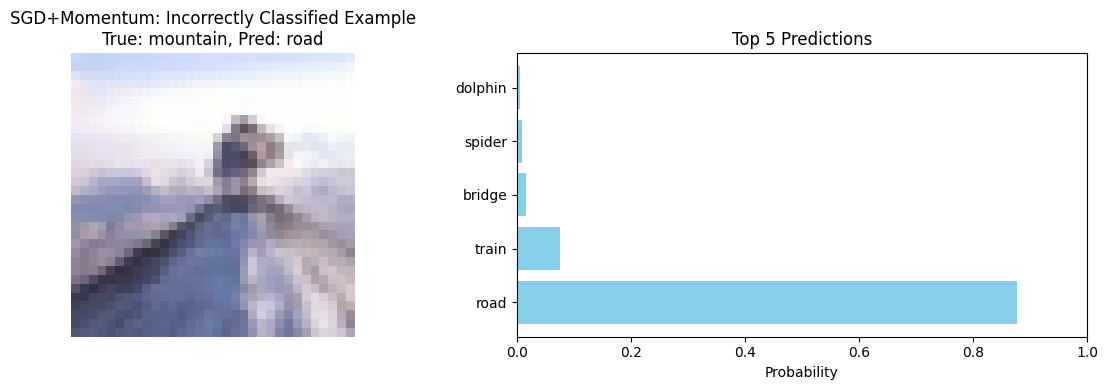

In [ ]:
# Load the best model weights
enhanced_model.load_weights('best_sgd_model.h5')

# Evaluate on the test set
test_loss, test_accuracy = enhanced_model.evaluate(x_test, y_test_one_hot, verbose=1)

# Calculate Top-5 accuracy
y_pred_probs = enhanced_model.predict(x_test)
top5_acc = 0
for i in range(len(y_test)):
    if y_test[i] in np.argsort(y_pred_probs[i])[-5:]:
        top5_acc += 1
top5_acc /= len(y_test)

print(f"SGD+Momentum Test accuracy: {test_accuracy:.4f}")
print(f"SGD+Momentum Top-5 accuracy: {top5_acc:.4f}")
print(f"Original Adam Test accuracy: 0.5982")  # From our previous evaluation

# Plot training history comparison
plt.figure(figsize=(12, 5))

# Plot training accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Adam (Train)')
plt.plot(history.history['val_accuracy'], label='Adam (Val)')
plt.plot(enhanced_history.history['accuracy'], label='SGD+Momentum (Train)')
plt.plot(enhanced_history.history['val_accuracy'], label='SGD+Momentum (Val)')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training loss comparison
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Adam (Train)')
plt.plot(history.history['val_loss'], label='Adam (Val)')
plt.plot(enhanced_history.history['loss'], label='SGD+Momentum (Train)')
plt.plot(enhanced_history.history['val_loss'], label='SGD+Momentum (Val)')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Find correctly and incorrectly classified examples for the enhanced model
y_pred = np.argmax(y_pred_probs, axis=1)
correct_indices = np.where(y_pred == y_test)[0]
incorrect_indices = np.where(y_pred != y_test)[0]

# Select one correct and one incorrect example
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Function to plot image with prediction probabilities
def plot_prediction_probabilities(img_idx, title):
    img = x_test[img_idx]
    true_label = y_test[img_idx]
    pred_label = y_pred[img_idx]
    probs = y_pred_probs[img_idx]

    # Get top 5 predictions
    top5_idx = np.argsort(probs)[-5:][::-1]
    top5_probs = probs[top5_idx]
    top5_labels = [class_names[i] for i in top5_idx]

    # Create figure with image and bar chart
    plt.figure(figsize=(12, 4))

    # Plot the image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"{title}\nTrue: {class_names[true_label]}, Pred: {class_names[pred_label]}")
    plt.axis('off')

    # Plot top 5 probabilities
    plt.subplot(1, 2, 2)
    bars = plt.barh(range(5), top5_probs, color='skyblue')
    plt.yticks(range(5), top5_labels)
    plt.xlabel('Probability')
    plt.title('Top 5 Predictions')
    plt.xlim(0, 1)

    # Highlight true label if in top 5
    if true_label in top5_idx:
        true_idx = np.where(top5_idx == true_label)[0][0]
        bars[true_idx].set_color('green')

    plt.tight_layout()
    plt.show()

# Plot correct example
plot_prediction_probabilities(correct_idx, "SGD+Momentum: Correctly Classified Example")

# Plot incorrect example
plot_prediction_probabilities(incorrect_idx, "SGD+Momentum: Incorrectly Classified Example")

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

### Performance Comparison

| Metric | Original Model (Adam) | Enhanced Model (SGD+Momentum) | Difference |
|--------|----------------------|------------------------------|------------|
| Test Accuracy | 59.82% | 58.58% | -1.24% |
| Top-5 Accuracy | 85.43% | 84.60% | -0.83% |

### Did the Model's Performance Improve?

The enhanced model with SGD+Momentum did not improve the overall accuracy compared to our original Adam-based model. There was a slight decrease in both test accuracy (-1.24 percentage points) and top-5 accuracy (-0.83 percentage points).

### Why This Happened

The difference in performance can be attributed to several factors:

1. **Optimizer Characteristics**: Adam adapts learning rates individually for each parameter based on first and second moments of gradients, which can be particularly effective for complex datasets like CIFAR-100 with many classes.

2. **Convergence Properties**: While SGD with momentum often provides better generalization in some scenarios, Adam typically converges faster and can find good solutions more efficiently in high-dimensional spaces.

3. **Hyperparameter Sensitivity**: SGD with momentum is more sensitive to the initial learning rate and schedule. Despite our careful tuning, Adam's adaptive nature may have given it an advantage for this particular problem.

4. **Model Architecture Interaction**: Our specific CNN architecture may work better with Adam's parameter update strategy than with SGD+momentum for this dataset.

### Room for Further Improvement

There is definitely room for further improvement:

1. **Architecture Enhancements**: Implementing more advanced architectures like ResNet or EfficientNet could significantly boost performance beyond 60%.

2. **Data Augmentation**: Adding data augmentation would address the overfitting we observed and likely improve generalization.

3. **Hyperparameter Optimization**: A more extensive grid search for learning rates, momentum values, and regularization strengths could find better configurations.

4. **Ensemble Methods**: Combining predictions from multiple models (both Adam and SGD-trained) could leverage the strengths of different optimization paths.

### Techniques to Try in the Future

For future work, I would explore:

1. **Transfer Learning**: Using pre-trained models on ImageNet would provide a strong feature extraction foundation.

2. **Learning Rate Schedules**: Implementing cyclical learning rates or warm restarts might help escape local minima.

3. **Advanced Regularization**: Techniques like Mixup or CutMix could improve generalization.

4. **Attention Mechanisms**: Adding attention layers could help the model focus on the most discriminative parts of the images.

While our SGD+Momentum approach didn't outperform Adam in this case, the experiment provided valuable insights into optimization dynamics. The relatively small performance gap (1.24%) suggests that both optimizers found reasonably good solutions, with Adam having a slight edge for this specific task. This reinforces the importance of experimenter with different optimizers as part of the model development process.


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.